## Importing Libraries

In [1]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt 

## Loading the CSV file

In [2]:
df=pd.read_csv(r"Multiple CSV\1.ushape.csv",header=None) 
df.head() 

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


### Identifying the Input and Output Features

In [3]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int) 

In [4]:
x.head() 

,0,1
0,0.031595,0.986988
1,2.115098,-0.046244
2,0.882490,-0.075756
3,-0.055144,-0.037332
4,0.829545,-0.539321


In [5]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: 2, dtype: int32

### Spliting the data into train and test

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [7]:
x_train.shape

(90, 2)

In [8]:
x_test.shape 

(10, 2)

### Standardizing input features

In [9]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

### Building the Logical Structure

In [25]:
from keras import Sequential 
from keras.layers import Dense, BatchNormalization
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD

In [26]:
model=Sequential()
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(BatchNormalization())
model.add(Dense(12,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(8,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))  

**Observation:**
- As the data is much complex, relu activation function is used.
- As model is overfitting, Regularization is used as Lasso with 0.001 learning rate.
- As target variable contains binary class, In output layer i have used sigmoid as activation function.
- As Regularization is used, to overcome the internal covariate shift i have used batch normalization.

In [27]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 18)                54        
                                                                 
 dense_8 (Dense)             (None, 16)                304       
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dense_9 (Dense)             (None, 12)                204       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                      

### Compling the model

In [28]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])

In [29]:
history=model.fit(x_train,y_train,batch_size=5,epochs=40,validation_split=0.1)

Epoch 1/40
17/17 [==============================] - 1s 17ms/step - loss: 0.7043 - accuracy: 0.6296 - val_loss: 0.7212 - val_accuracy: 0.7778
Epoch 2/40
17/17 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.7160 - val_loss: 0.7134 - val_accuracy: 0.7778
Epoch 3/40
17/17 [==============================] - 0s 6ms/step - loss: 0.6412 - accuracy: 0.7531 - val_loss: 0.7019 - val_accuracy: 0.7778
Epoch 4/40
17/17 [==============================] - 0s 6ms/step - loss: 0.6161 - accuracy: 0.7901 - val_loss: 0.6908 - val_accuracy: 0.7778
Epoch 5/40
17/17 [==============================] - 0s 6ms/step - loss: 0.6024 - accuracy: 0.8272 - val_loss: 0.6847 - val_accuracy: 0.6667
Epoch 6/40
17/17 [==============================] - 0s 8ms/step - loss: 0.5879 - accuracy: 0.7778 - val_loss: 0.6708 - val_accuracy: 0.7778
Epoch 7/40
17/17 [==============================] - 0s 7ms/step - loss: 0.5754 - accuracy: 0.8519 - val_loss: 0.6640 - val_accuracy: 0.7778
Epoch 8/40
17/17 [=

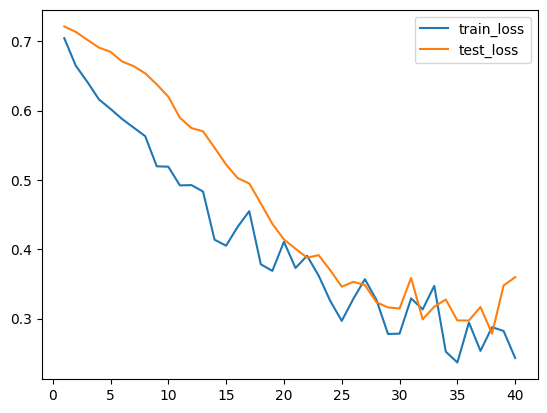

In [30]:
plt.plot(range(1,41),history.history["loss"],label="train_loss")
plt.plot(range(1,41),history.history["val_loss"],label="test_loss") 
plt.legend() 

### Predicting the model


In [31]:
predicted=model.predict(x_test) 
predicted 

1/1 [==============================] - 0s 100ms/step


array([[0.07035396],
       [0.8021627 ],
       [0.0912716 ],
       [0.02437679],
       [0.19431785],
       [0.99753445],
       [0.04642332],
       [0.03385224],
       [0.97534865],
       [0.9952957 ]], dtype=float32)

In [32]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

### Evaluating the model 

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))

1.0


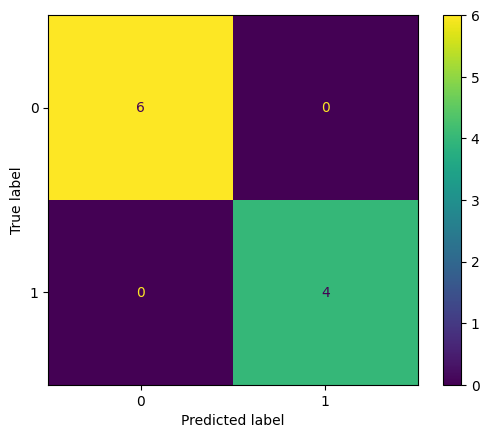

In [38]:
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

### PLOTING THE DECISION SURFACE

In [34]:
from mlxtend.plotting  import plot_decision_regions 

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

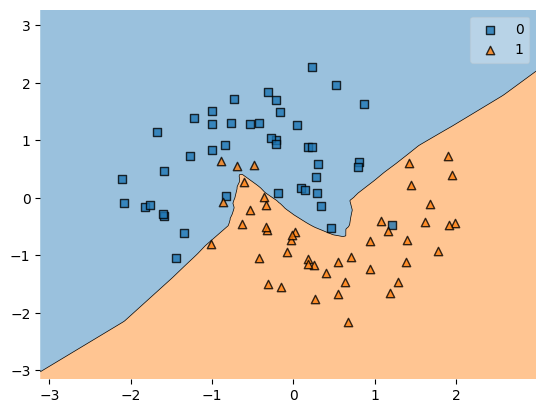

In [35]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 19s 2ms/step


<Axes: >

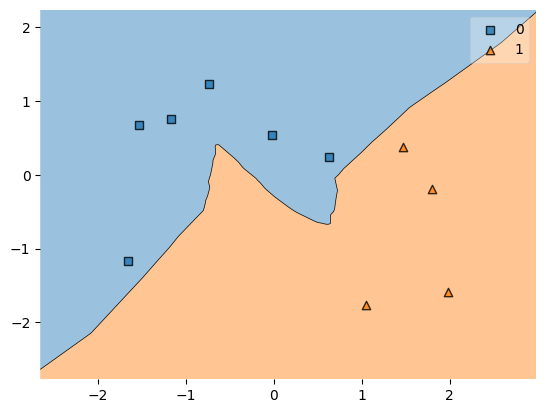

In [36]:
plot_decision_regions(x_test,y_test.values,clf=model) 

### Conclusions:

###### This neural network model achieves an accuracy of 100%. 
- The model architecture consists of 4 hidden layers with the following specifications:

- In the first hidden layer, there are 18 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- In the second hidden layer, there are 16 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- In the third hidden layer, there are 12 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.
- In the fourth hidden layer, there are 8 neurons with the ReLU activation function and an L2 regularizer with a strength of 0.001.

#### The output layer uses the sigmoid activation function.

### In model compilation,
- Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 5 and a learning rate of 0.01.
- The model was trained for 40 epochs.

#### Overall, this neural network model architecture and training configuration achieve an accuracy of 100%.